In [42]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import TimeSeriesSplit
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('output/loan_train.csv')
data




,loan_id,date_loan,duration_loan,payments_loan,status,account_district,account_frequency,account_date,owner_district,owner_card_type,...,last_trans_balance,mean_trans_balance,mean_trans_amount_absolute,mean_trans_amount_credit,mean_trans_amount_withdrawal,mean_trans_amount_signed,owner_male,owner_birthdate,disponent_male,disponent_birthdate
0,5314,930705,12,8033,1,30,2,930322,30,3,...,20100.0,12250.000000,5025.000000,5025.000000,NaN,5025.000000,0,470722,NaN,NaN
1,5316,930711,36,4610,0,46,1,930213,46,3,...,52208.9,52083.859459,11015.635135,13523.158824,8884.240000,1411.051351,1,680722,NaN,NaN
2,6863,930728,60,2118,0,45,1,930208,45,3,...,20272.8,30060.954167,5417.458333,5009.733333,6097.000000,844.708333,1,360602,NaN,NaN
3,5325,930803,36,2939,0,12,1,930130,14,3,...,34307.3,41297.480000,8253.080000,9254.600000,7168.100000,1371.704000,0,400420,NaN,NaN
4,7240,930906,60,4579,0,1,2,930214,63,3,...,41112.9,57188.211111,18945.966667,21255.930769,16801.000000,1522.707407,1,780907,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6818,961212,48,3242,0,72,1,950121,72,3,...,60694.1,44197.509884,4895.974419,6448.582857,3830.458824,352.872093,0,710410,1.0,790610.0
324,5625,961215,60,3703,1,29,1,951129,29,3,...,59578.8,55230.444068,11725.494915,13417.557143,10197.180645,1009.813559,1,390320,NaN,NaN
325,6805,961221,48,938,0,70,1,960521,70,3,...,38384.3,41994.907692,7779.815385,8544.930000,6974.431579,984.215385,0,570504,NaN,NaN
326,7233,961225,36,3217,0,16,1,950520,16,3,...,41878.1,56646.516129,13280.084677,16554.986275,10992.139726,337.726613,1,530601,NaN,NaN


In [43]:
data.isna().any()

loan_id                                                      False
date_loan                                                    False
duration_loan                                                False
payments_loan                                                False
status                                                       False
account_district                                             False
account_frequency                                            False
account_date                                                 False
owner_district                                               False
owner_card_type                                              False
owner_card_issued                                             True
disponent_district                                            True
disponent_card_type                                          False
disponent_card_issued                                         True
count_trans_credits                                          F

# Cols with NaN values

owner_card_issued
disponent_district
disponent_card_issued
mean_trans_amount_withdrawal
disponent_male
disponent_birthdate

In [44]:
inputs = data.drop(["owner_card_issued", "disponent_district", "disponent_card_issued", "mean_trans_amount_withdrawal", "disponent_male", "disponent_birthdate"], axis=1)

inputs.sort_values(by=['date_loan'])
inputs

,loan_id,date_loan,duration_loan,payments_loan,status,account_district,account_frequency,account_date,owner_district,owner_card_type,...,count_trans_ksymbol_insurance_payment,count_trans_ksymbol_sanction_interest_if_negative_balance,count_trans_ksymbol_oldage_pension,last_trans_balance,mean_trans_balance,mean_trans_amount_absolute,mean_trans_amount_credit,mean_trans_amount_signed,owner_male,owner_birthdate
0,5314,930705,12,8033,1,30,2,930322,30,3,...,0,0,0,20100.0,12250.000000,5025.000000,5025.000000,5025.000000,0,470722
1,5316,930711,36,4610,0,46,1,930213,46,3,...,0,0,0,52208.9,52083.859459,11015.635135,13523.158824,1411.051351,1,680722
2,6863,930728,60,2118,0,45,1,930208,45,3,...,0,0,0,20272.8,30060.954167,5417.458333,5009.733333,844.708333,1,360602
3,5325,930803,36,2939,0,12,1,930130,14,3,...,0,0,0,34307.3,41297.480000,8253.080000,9254.600000,1371.704000,0,400420
4,7240,930906,60,4579,0,1,2,930214,63,3,...,0,0,0,41112.9,57188.211111,18945.966667,21255.930769,1522.707407,1,780907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6818,961212,48,3242,0,72,1,950121,72,3,...,0,0,0,60694.1,44197.509884,4895.974419,6448.582857,352.872093,0,710410
324,5625,961215,60,3703,1,29,1,951129,29,3,...,0,0,0,59578.8,55230.444068,11725.494915,13417.557143,1009.813559,1,390320
325,6805,961221,48,938,0,70,1,960521,70,3,...,0,0,0,38384.3,41994.907692,7779.815385,8544.930000,984.215385,0,570504
326,7233,961225,36,3217,0,16,1,950520,16,3,...,0,0,0,41878.1,56646.516129,13280.084677,16554.986275,337.726613,1,530601


In [45]:
Y = data["status"].values
X = inputs.drop("status", axis=1).values

In [46]:

estimator = DecisionTreeClassifier(splitter='best', min_samples_split=6, min_samples_leaf=5, max_features=6, max_depth=41, criterion='gini')
selector = RFECV(estimator, cv=TimeSeriesSplit(), scoring='roc_auc')
selector.fit(X, Y)


RFECV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
      estimator=GradientBoostingClassifier(), scoring='roc_auc')

c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


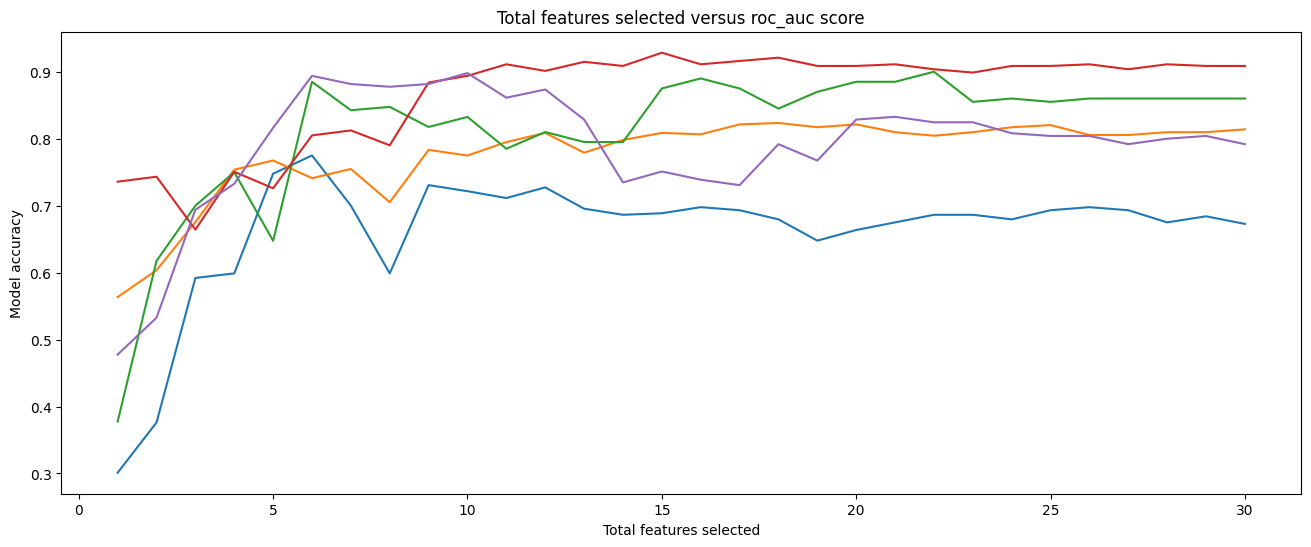

In [47]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus roc_auc score')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [49]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': selector.support_[i], 'ranking': selector.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10)


C:\Users\nrtc\AppData\Local\Temp\ipykernel_34284\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\nrtc\AppData\Local\Temp\ipykernel_34284\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\nrtc\AppData\Local\Temp\ipykernel_34284\1288347173.py:5: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\nrtc\AppData\Local\Temp\ipykernel_34284\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

,feature,support,ranking
29,29,True,1
27,27,True,1
3,3,True,1
25,25,True,1
24,24,True,1
23,23,True,1
21,21,True,1
10,10,True,1
18,18,True,1
16,16,True,1


In [50]:
selected_features = selector.get_support(1)
selected_features

array([ 3, 10, 16, 18, 21, 23, 24, 25, 27, 29], dtype=int64)

In [53]:
new_inputs = inputs[inputs.columns[selected_features]]
new_inputs.columns

Index(['payments_loan', 'disponent_card_type',
       'count_trans_collection_other_bank',
       'count_trans_ksymbol_interest_credited',
       'count_trans_ksymbol_insurance_payment',
       'count_trans_ksymbol_oldage_pension', 'last_trans_balance',
       'mean_trans_balance', 'mean_trans_amount_credit', 'owner_male'],
      dtype='object')